In [1]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [91]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [8]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [12]:
def score(X, y):
    
    X = X.copy()
    y = y.copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    
    model = RandomForestClassifier(random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

In [13]:
score(data.drop(columns='Type'), data.Type)

(0.9534883720930233, 0.8178342632775367)

## Визуальный способ

<Axes: >

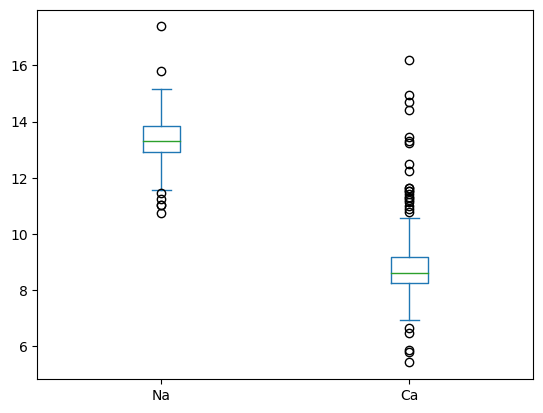

In [34]:
data[['Na', 'Ca']].plot(kind='box')

<Axes: >

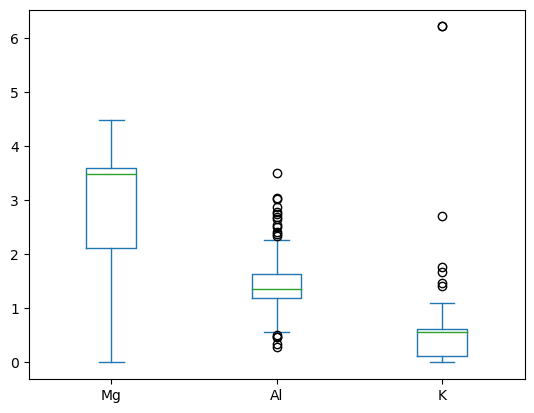

In [35]:
data[['Mg', 'Al', 'K']].plot(kind='box')

<Axes: >

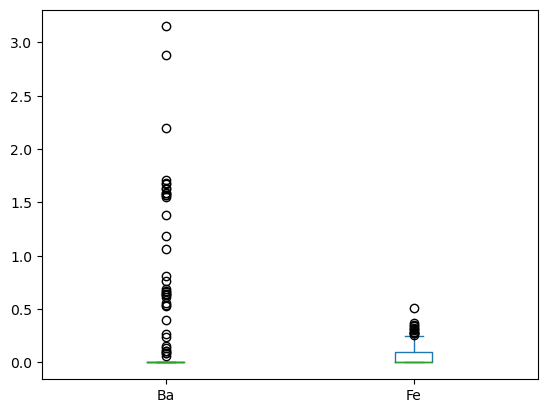

In [36]:
data[['Ba', 'Fe']].plot(kind='box')

<Axes: >

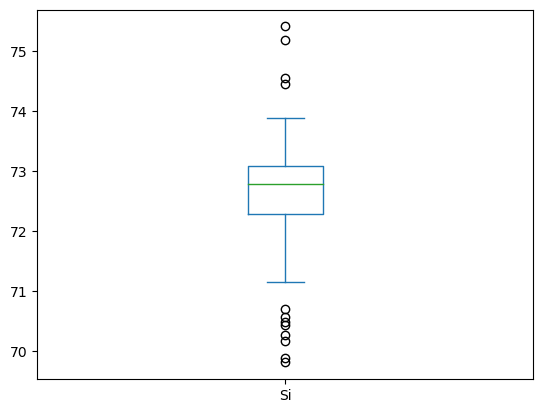

In [37]:
data['Si'].plot(kind='box')

<Axes: >

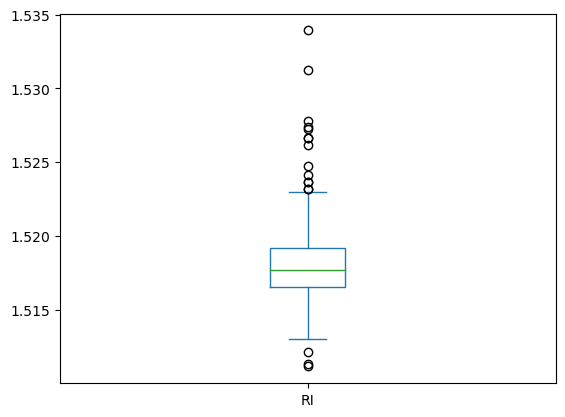

In [38]:
data['RI'].plot(kind='box')

In [49]:
clear = data[(data.RI >= data.RI.quantile(.25)) &
             (data.RI <= data.RI.quantile(.75)) &
             
             (data.Na >= data.Na.quantile(.25)) &
             (data.Na <= data.Na.quantile(.75)) &
             
             (data.Ca >= data.Ca.quantile(.25)) &
             (data.Ca <= data.Ca.quantile(.75)) &
             
             (data.Al >= data.Al.quantile(.25)) &
             (data.Al <= data.Al.quantile(.75)) &
             
             (data.K >= data.K.quantile(.25)) &
             (data.K <= data.K.quantile(.75)) &
             
             (data.Si >= data.Si.quantile(.25)) &
             (data.Si <= data.Si.quantile(.75)) 
            ]

In [50]:
clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 9 to 156
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      19 non-null     float64
 1   Na      19 non-null     float64
 2   Mg      19 non-null     float64
 3   Al      19 non-null     float64
 4   Si      19 non-null     float64
 5   K       19 non-null     float64
 6   Ca      19 non-null     float64
 7   Ba      19 non-null     float64
 8   Fe      19 non-null     float64
 9   Type    19 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 KB


In [58]:
score(clear.drop(columns='Type'), clear.Type)

(0.25, -0.33333333333333326)

In [105]:
clear_1 = data[(data.RI >= data.RI.quantile(.25)) &
             (data.RI <= data.RI.quantile(.75)) &
             
             (data.Si >= data.Si.quantile(.25)) &
             (data.Si <= data.Si.quantile(.75)) 
            ]

In [107]:
clear_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 210
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      70 non-null     float64
 1   Na      70 non-null     float64
 2   Mg      70 non-null     float64
 3   Al      70 non-null     float64
 4   Si      70 non-null     float64
 5   K       70 non-null     float64
 6   Ca      70 non-null     float64
 7   Ba      70 non-null     float64
 8   Fe      70 non-null     float64
 9   Type    70 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 6.0 KB


In [110]:
score(clear_1.drop(columns='Type'), clear_1.Type)

(0.21428571428571427, 0.9072847682119205)

## Модельный способ

In [101]:
cls = [
    ('svm', OneClassSVM(nu=.1)),
    ('if', IsolationForest()),
    ('loc', LocalOutlierFactor(novelty=True))
]

In [102]:
cls_data = data[['RI', 'Si']]

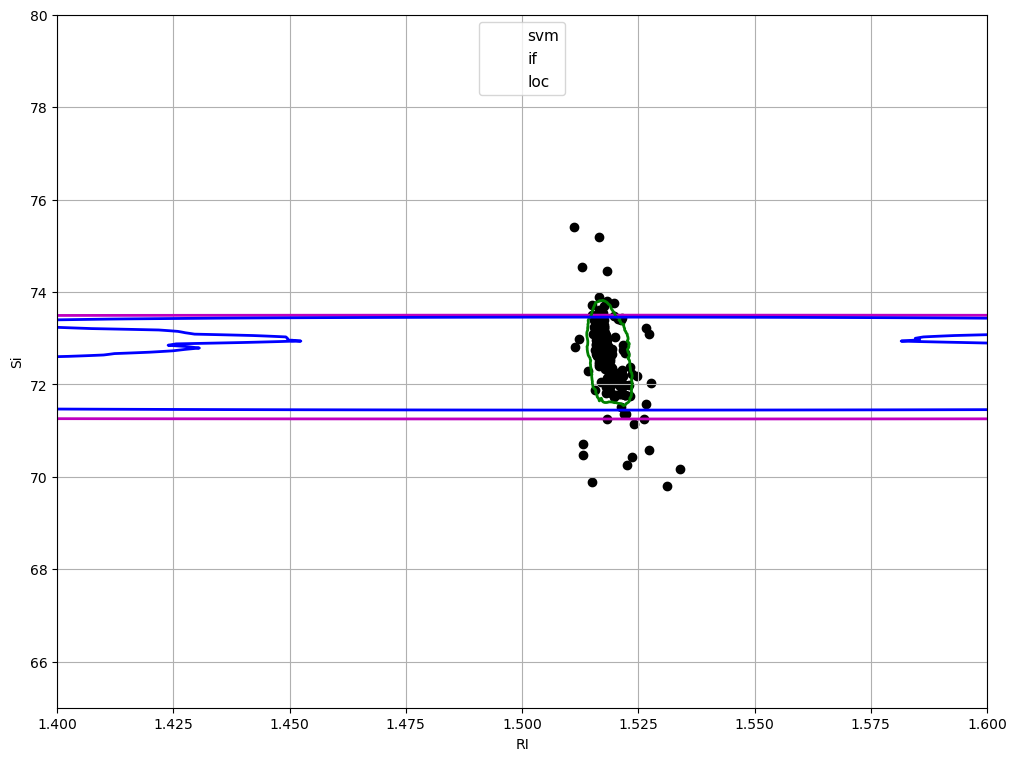

In [104]:
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(1.4, 1.6, 500), np.linspace(65, 80, 500))
for i, (clf_name, clf) in enumerate(cls):
    plt.figure(1, figsize=(12,9))
    clf.fit(cls_data)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.scatter(cls_data.RI, cls_data.Si, color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0], legend1_values_list[1].collections[0], legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center", 
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel("Si")
plt.xlabel("RI")
plt.grid()
plt.show()

In [112]:
clear_2 = data[
    (data.RI >= 1.51)&
    (data.RI <= 1.52)&
    (data.Si >= 71.5)&
    (data.Si <= 74)
]

In [113]:
clear_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 1 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      162 non-null    float64
 1   Na      162 non-null    float64
 2   Mg      162 non-null    float64
 3   Al      162 non-null    float64
 4   Si      162 non-null    float64
 5   K       162 non-null    float64
 6   Ca      162 non-null    float64
 7   Ba      162 non-null    float64
 8   Fe      162 non-null    float64
 9   Type    162 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 13.9 KB


In [117]:
score(clear_2.drop(columns='Type'), clear_2.Type)

(0.12121212121212122, 0.9714038128249567)

In [116]:
print(f'Потеря данных clear составит {round((1 - len(clear) / len(data)) * 100, 2)}%')
print(f'Потеря данных clear_1 составит {round((1 - len(clear_1) / len(data)) * 100, 2)}%')
print(f'Потеря данных clear_2 составит {round((1 - len(clear_2) / len(data)) * 100, 2)}%')

Потеря данных clear составит 91.12%
Потеря данных clear_1 составит 67.29%
Потеря данных clear_2 составит 24.3%


## Вывод

На данных с выбросами точность модели составила 81%, что в целом приемлемо, но не очень хорошо.  
В случае, когда удаляются все выбросы (потеря данных составляет 91%) - модели не хватает данных, чтоб обучиться и получается неадекватное значение.  
В случае, когда выбираются пара признаков и выбросы удаляются после визуального осмотра, точность модели вырастает до 90.7%.  
В случае с модельным способом выявления выбросов, потеря данных составит всего 24%, а njxyjcnm djphfcntn lj 